In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px


In [57]:
"""
indices = {
    'S&P 500': '^GSPC',
    'Nasdaq 100': '^NDX',
    'Dow Jones Industrial Average': '^DJI',
    'Russell 2000': '^RUT',
    'DAX 40': '^GDAXI',
    'CAC 40': '^FCHI',
    'FTSE 100': '^FTSE',
    'Nikkei 225': '^N225',
    'Hang Seng Index': '^HSI',
    'Euro Stoxx 50': '^STOXX50E'
}

start_date = '2018-01-01'
end_date = '2024-12-31'

# Descargar y guardar cada índice
for nombre, ticker in indices.items():
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f'{nombre.replace(" ", "_")}.csv')
    print(f'Datos guardados para {nombre}')

""";

In [58]:
sp_500 = pd.read_csv("./../CSVs/S&P_500.csv")
cac_40 = pd.read_csv("./../CSVs/CAC_40.csv")
dax_40 = pd.read_csv("./../CSVs/DAX_40.csv")
dow_jones = pd.read_csv("./../CSVs/Dow_Jones.csv")
euro_stoxx_50 = pd.read_csv("./../CSVs/Euro_Stoxx_50.csv")
ftse_100 = pd.read_csv("./../CSVs/FTSE_100.csv")
hang_seng_index = pd.read_csv("./../CSVs/Hang_Seng_Index.csv")
nasdaq_100 = pd.read_csv("./../CSVs/Nasdaq_100.csv")
nikkei_225 = pd.read_csv("./../CSVs/Nikkei_225.csv")
russell_2000 = pd.read_csv("./../CSVs/Russell_2000.csv")

sp_500 = sp_500[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
cac_40 = cac_40[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
dax_40 = dax_40[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
dow_jones = dow_jones[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
euro_stoxx_50 = euro_stoxx_50[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ftse_100 = ftse_100[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
hang_seng_index = hang_seng_index[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
nasdaq_100 = nasdaq_100[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
nikkei_225 = nikkei_225[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
russell_2000 = russell_2000[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

sp_500.set_index("Date", inplace=True)
cac_40.set_index("Date", inplace=True)
dax_40.set_index("Date", inplace=True)
dow_jones.set_index("Date", inplace=True)
euro_stoxx_50.set_index("Date", inplace=True)
ftse_100.set_index("Date", inplace=True)
hang_seng_index.set_index("Date", inplace=True)
nasdaq_100.set_index("Date", inplace=True)
nikkei_225.set_index("Date", inplace=True)
russell_2000.set_index("Date", inplace=True)



In [63]:
def analizar_indice(df, nombre='Índice'):
    """
    Recibe un DataFrame con columnas: Open, High, Low, Close, Volume.
    Devuelve el mismo DataFrame con columnas clave de análisis financiero.
    También imprime métricas importantes para comparar entre índices.
    """

    # -------------------------
    # Rentabilidad diaria
    df['Rentabilidad'] = df['Close'].pct_change()
    # La misma rentabilidad en porcentaje
    df['Rentabilidad_%'] = df['Rentabilidad'] * 100

    # Media móvil de 10 y 50 días
    df['Media_Movil_10d'] = df['Close'].rolling(window=10).mean()
    df['Media_Movil_50d'] = df['Close'].rolling(window=50).mean()

    # Rentabilidad acumulada (desde el primer día)
    df['Rentabilidad_Acumulada'] = (1 + df['Rentabilidad']).cumprod()

    # Máximo acumulado y caída máxima (drawdown)
    df['Maximo_Acumulado'] = df['Rentabilidad_Acumulada'].cummax()
    df['Caida_Maxima'] = df['Rentabilidad_Acumulada'] / df['Maximo_Acumulado'] - 1
    df = df.drop(columns=['Maximo_Acumulado'])

    # Volatilidad móvil (30 días)
    df['Volatilidad_30d'] = df['Rentabilidad'].rolling(window=30).std()

    # Ratio de Sharpe móvil (30 días)
    df['Sharpe_30d'] = df['Rentabilidad'].rolling(window=30).mean() / df['Volatilidad_30d']

    # -------------------------
    # Indicadores globales (CAGR, caída máxima, etc.)
    años = (pd.to_datetime(df.index[-1]) - pd.to_datetime(df.index[0])).days / 365
    precio_inicial = df['Close'].iloc[0]
    precio_final = df['Close'].iloc[-1]
    tasa_crecimiento_anual_compuesta = (precio_final / precio_inicial) ** (1 / años) - 1

    caida_maxima_promedio = df['Caida_Maxima'].mean()
    volatilidad_media = df['Volatilidad_30d'].mean()
    sharpe_medio = df['Sharpe_30d'].mean()

    # -------------------------
    # Mostrar resumen
    print(f'\n📊 {nombre}')
    print(f'Tasa de Crecimiento Anual Compuesta (CAGR): {tasa_crecimiento_anual_compuesta:.2%}')
    print(f'Caída máxima promedio (Drawdown): {caida_maxima_promedio:.2%}')
    print(f'Volatilidad media (30 días): {volatilidad_media:.2%}')
    print(f'Ratio de Retorno/Riesgo medio (30 días): {sharpe_medio:.2f}')

    # -------------------------
    return df


In [64]:
sp_500 = analizar_indice(sp_500, nombre='S&P 500')
cac_40 = analizar_indice(cac_40, nombre='CAC 40')
dax_40 = analizar_indice(dax_40, nombre='DAX 40')
dow_jones = analizar_indice(dow_jones, nombre='Dow Jones')
euro_stoxx_50 = analizar_indice(euro_stoxx_50, nombre='Euro Stoxx 50')
ftse_100 = analizar_indice(ftse_100, nombre='FTSE 100')
hang_seng_index = analizar_indice(hang_seng_index, nombre='Hang Seng Index')
nasdaq_100 = analizar_indice(nasdaq_100, nombre='Nasdaq 100')
nikkei_225 = analizar_indice(nikkei_225, nombre='Nikkei 225')
russell_2000 = analizar_indice(russell_2000, nombre='Russell 2000')



📊 S&P 500
Tasa de Crecimiento Anual Compuesta (CAGR): 11.86%
Caída máxima promedio (Drawdown): -6.02%
Volatilidad media (30 días): 1.06%
Ratio de Retorno/Riesgo medio (30 días): 0.10

📊 CAC 40
Tasa de Crecimiento Anual Compuesta (CAGR): 4.74%
Caída máxima promedio (Drawdown): -7.39%
Volatilidad media (30 días): 1.05%
Ratio de Retorno/Riesgo medio (30 días): 0.05

📊 DAX 40
Tasa de Crecimiento Anual Compuesta (CAGR): 6.43%
Caída máxima promedio (Drawdown): -7.53%
Volatilidad media (30 días): 1.08%
Ratio de Retorno/Riesgo medio (30 días): 0.06

📊 Dow Jones
Tasa de Crecimiento Anual Compuesta (CAGR): 8.01%
Caída máxima promedio (Drawdown): -5.54%
Volatilidad media (30 días): 1.01%
Ratio de Retorno/Riesgo medio (30 días): 0.07

📊 Euro Stoxx 50
Tasa de Crecimiento Anual Compuesta (CAGR): 4.79%
Caída máxima promedio (Drawdown): -7.61%
Volatilidad media (30 días): 1.08%
Ratio de Retorno/Riesgo medio (30 días): 0.05

📊 FTSE 100
Tasa de Crecimiento Anual Compuesta (CAGR): 0.86%
Caída máxima pro

In [67]:
sp_500

,Open,High,Low,Close,Volume,Rentabilidad,Rentabilidad_%,Media_Movil_10d,Media_Movil_50d,Rentabilidad_Acumulada,Caida_Maxima,Volatilidad_30d,Sharpe_30d
Date,,,,,,,,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0.006399,0.639882,NaN,NaN,1.006399,0.000000,NaN,NaN
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0.004029,0.402864,NaN,NaN,1.010453,0.000000,NaN,NaN
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0.007034,0.703377,NaN,NaN,1.017561,0.000000,NaN,NaN
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,3246160000,0.001662,0.166234,NaN,NaN,1.019252,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5940.250000,5978.250000,5902.569824,5974.069824,3593280000,0.007287,0.728727,5999.029004,5930.204404,2.216057,-0.019080,0.007533,-0.012194
2024-12-24,5984.629883,6040.100098,5981.439941,6040.040039,1757720000,0.011043,1.104276,5999.541992,5933.808203,2.240529,-0.008248,0.007802,0.031266
2024-12-26,6024.970215,6049.750000,6007.370117,6037.589844,2904530000,-0.000406,-0.040566,5994.881982,5938.254805,2.239620,-0.008650,0.007780,0.042007


<Axes: xlabel='Date'>

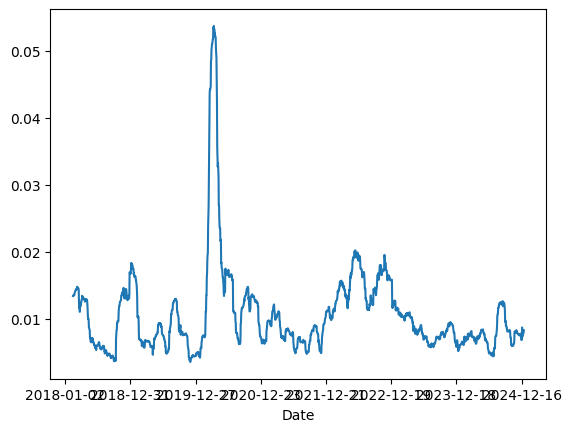